In [33]:
import numpy as np
import matplotlib.pyplot as plt

from Matrica import Matrica

In [2]:
mat = Matrica()
mat.load_from_numpy(np.array([[1,4],[2,3]]))
print mat.inverse()

[[-0.6  0.8]
 [ 0.4 -0.2]]


In [49]:
def RungeKutta(A, B, x0, T, t_max, print_every=1):
    x = x0.copy();

    tt = T;
    cc = 0;
    
    sol = []
    timesteps = []
    sol.append(x.copy())
    timesteps.append(0)
    while (tt < t_max):
        m1 = np.dot(A,x) + B;
        m2 = np.dot(A,(x + np.dot(T / 2., m1))) + B;
        m3 = np.dot(A, (x + np.dot(T / 2., m2))) + B;
        m4 = np.dot(A, (x + np.dot(T, m3))) + B;

        x = x + np.dot(T / 6., (m1 + 2 * m2 + 2 * m3 + m4));

        if (cc % print_every == 0):
            print x;
            print
        
        sol.append(x.copy())
        timesteps.append(tt)
        cc+=1;
        tt += T;
    return timesteps, sol
        

def Trapez(A, B, x0, T, t_max, print_every=1):
    a_row = A.shape[0]
    I = np.zeros((a_row,a_row))
    x = x0.copy();
    
    for i in range(a_row):
        I[i, i] = 1;

    tt = T;
    cc = 0;
    
    sol = []
    timesteps = []
    sol.append(x.copy())
    timesteps.append(0)
    while(tt < t_max):
        temp1 = Matrica()
        temp1.load_from_numpy(I - T / 2. * A)
        inverz = temp1.inverse()
        
        m1 = np.dot(np.dot(inverz, (I + T / 2. * A)), x);
        m2 = np.dot(np.dot(T, inverz), B);
        x = m1 + m2;
        
        sol.append(x.copy())
        timesteps.append(tt)
        tt += T;

        if(cc % print_every == 0):
            print x;
            print
        
        cc+=1;
        
    return timesteps, sol

In [50]:
def visualize(timesteps, variables):
    vals = np.array(variables)
    size, _, _ = vals.shape
    x0 = vals[range(size),0,...]
    x1 = vals[range(size),1,...]
    plt.figure(figsize=(16,12))
    plt.subplot(2,2,1)
    plt.plot(timesteps,x0)
    plt.subplot(2,2,2)
    plt.plot(timesteps,x1)
    plt.show()

[[ 0.81818182]
 [-1.63636364]]



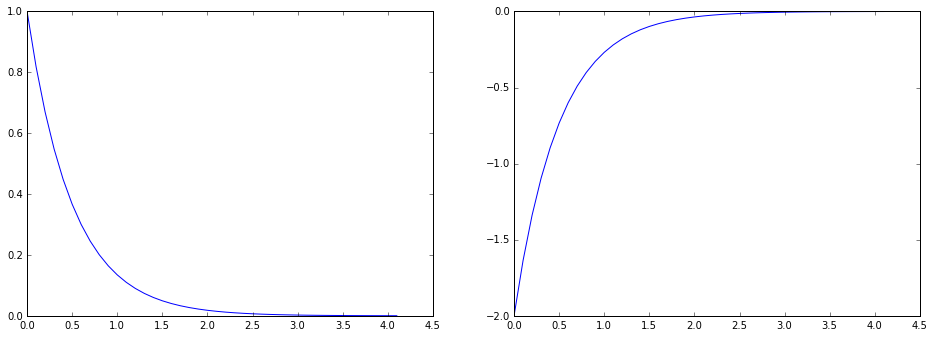

In [52]:
T = 0.1
A = np.array([[0,1],[-200,-102]])
B= np.array([[0],[0]])
x0 = np.array([[1],[-2]])
timesteps, sols = Trapez(A,B,x0,T,4.2,print_every=100)
visualize(timesteps, sols)